In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
df_fake = pd.read_csv("data/Fake.csv")
df_fake["label"] = 0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
df_true = pd.read_csv("data/True.csv")
df_true["label"] = 1
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
df = pd.concat([df_true, df_fake], ignore_index=True, axis=0)

In [5]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
df.shape

(44898, 5)

In [7]:
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [9]:
df.text[1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [10]:
df.drop(columns=["title", "subject", "date"], inplace=True)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [11]:
import re
import string
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [12]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,label
0,washington reuters the head of a conservat...,1
1,washington reuters transgender people will...,1
2,washington reuters the special counsel inv...,1
3,washington reuters trump campaign adviser ...,1
4,seattle washington reuters president donal...,1


In [16]:
import nltk
from nltk.corpus import stopwords
from string import punctuation


# nltk.download('punkt')
# nltk.download('stopwords')
sw_eng = stopwords.words("english") + list(punctuation)

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in sw_eng]))

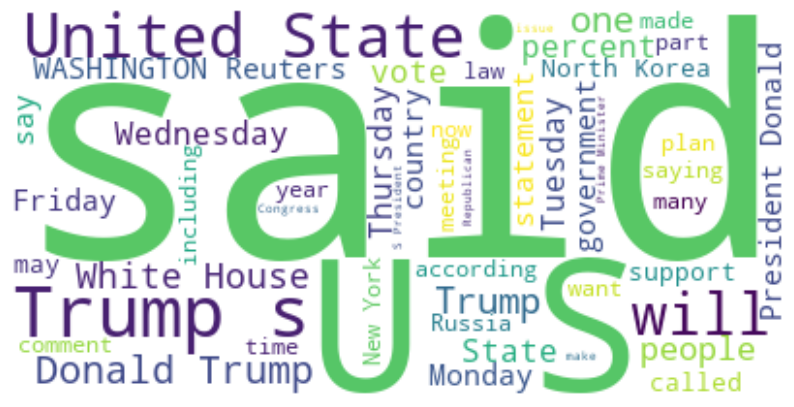

In [13]:
#WordCloud Visualizations
#Method for creating wordclouds
from wordcloud import WordCloud,STOPWORDS

from PIL import Image
def display_cloud(data,color):
    plt.subplots(figsize=(10,10))
    # mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   background_color="white", contour_width=2, contour_color=color,
                   max_words=50, max_font_size=64,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(df[df['label'] == 0]['text'],'red')

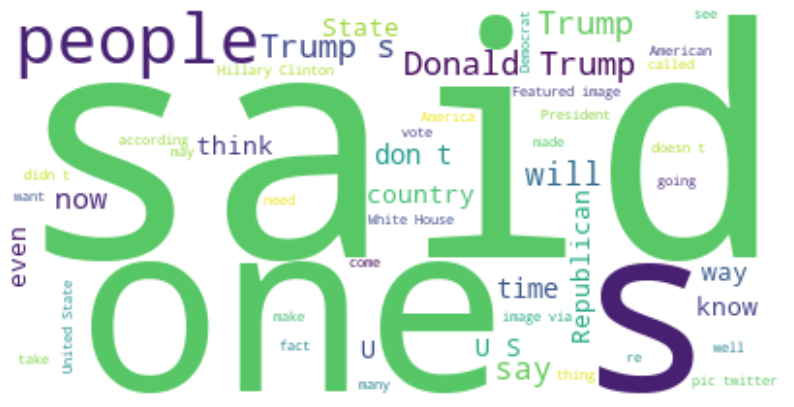

In [14]:
display_cloud(df[df['label'] == 1]['text'],'red')



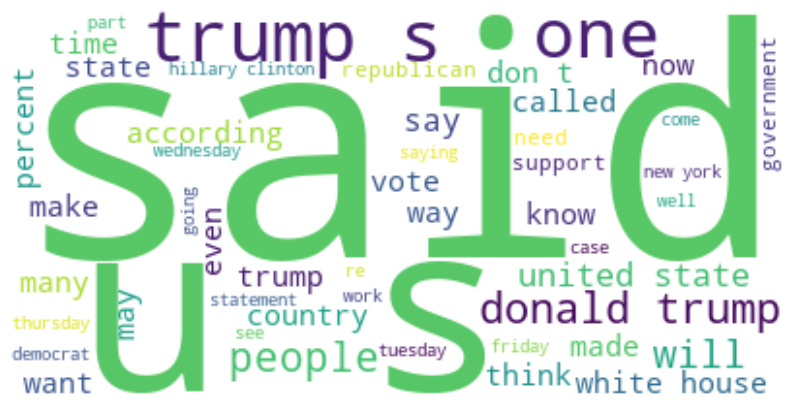

In [15]:
display_cloud(df['text'],'red')

In [ ]:
df['text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorized = TfidfVectorizer()
text = vectorized.fit_transform(df["text"])

vocab = vectorized.get_feature_names_out() # vocabulary
vocab[0:10] # 10 kata pertama dari vocabulary


array(['aa', 'aaa', 'aaaaaaaand', 'aaaaackkk', 'aaaaapkfhk', 'aaaahhhh',
       'aaaand', 'aaaarrgh', 'aaarf', 'aab'], dtype=object)

In [ ]:
df.text[1]

'washington  reuters    transgender people will be allowed for the first time to enlist in the u s  military starting on monday as ordered by federal courts  the pentagon said on friday  after president donald trump s administration decided not to appeal rulings that blocked his transgender ban  two federal appeals courts  one in washington and one in virginia  last week rejected the administration s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on jan    a justice department official said the administration will not challenge those rulings   the department of defense has announced that it will be releasing an independent study of these issues in the coming weeks  so rather than litigate this interim appeal before that occurs  the administration has decided to wait for dod s study and will continue to defend the president s lawful authority in district court in the meantime   the official said  speaking on condition o

In [ ]:

[vocab[index] for index in text[1].toarray()[0].argsort()[-10:]] # 10 kata yang paling penting dari artikel ke-1

['pentagon',
 'ban',
 'military',
 'recruits',
 'rulings',
 'administration',
 'to',
 'applicants',
 'the',
 'transgender']

In [ ]:
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918,), (8980,))

In [ ]:
X_train.head()

,text
14164,paris reuters french bank societe generale wed...
6909,winston salem n c reuters north carolina gover...
39608,civil political discourse took beating west vi...
1903,reuters new york washington state monday vowed...
9141,orlando fla reuters orlando nightclub killer o...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorized = TfidfVectorizer()
# X_train = vectorized.fit_transform(X_train["text"])
# X_test_vectorized = vectorized.fit_transform(X_test["text"])

In [ ]:
# X_train.shape, X_test_vectorized.shape

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 97447), (8980, 1), (35918,), (8980,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, stratify=y_test, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7184, 1), (1796, 1), (7184,), (1796,))

In [ ]:
X_train.head()

,text
31552,city whose former mayor stephanie rawlings bla...
3329,seattle reuters hawaii become first u state en...
7085,mexico city reuters mexican cement maker ready...
34269,woman say agree doctor theory man would vote h...
9355,washington reuters u immigration officials kic...


In [ ]:
from jcopml.tuning import random_search_params as rsp
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [ ]:
rsp.svm_params

{'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [ ]:
def preprocessing(df):
    df = df.apply(wordopt)
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in sw_eng]))
    return df

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
preprocessor = ColumnTransformer([
    ('preprocessing', FunctionTransformer(func=preprocessing), 'text')
], remainder='passthrough')

from sklearn.svm import SVC
pipeline = Pipeline([
    ('prep', preprocessor),
    ('text', TfidfVectorizer()),
    ('algo', SVC(max_iter=500))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [24]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 695.8780103230367, 'algo__fit_intercept': True}
1.0 0.9842704069382456 0.9838530066815144


In [27]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 43, 'algo__max_features': 0.11267184044357602, 'algo__min_samples_leaf': 19, 'algo__n_estimators': 180}
0.9958240534521158 0.9955455211910547 0.9933184855233853


In [25]:
text = "WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: “As mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.” Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal “great news.” “I’m hoping it means the government has come to see that there is no way to justify a ban and that it’s not good for the military or our country,” Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obama’s policy of accepting them. Trump said on Twitter at the time that the military “cannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.” Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trump’s ban while legal challenges to the Republican president’s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicants’ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept “some individuals who are not medically fit for service.” The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trump’s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the president’s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity."

df_pred = pd.DataFrame({"text": [text]})
df_pred.head()

,text
0,WASHINGTON (Reuters) - Transgender people will...


In [26]:
model.predict(df_pred)

array([1], dtype=int64)